<a href="https://colab.research.google.com/github/Gabriel-Paes/ml-classification/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q polars

In [28]:
# Importando o polars
import polars as pl
# Importando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Base Iris

In [36]:
# Carregando o conjunto de dados Iris
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

In [37]:
# Dividindo os dados iris em conjunto de treinamento e conjunto de teste
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

In [38]:
# Pré-processamento: Padronização dos dados iris
scaler = StandardScaler()
X_train_scaled_iris = scaler.fit_transform(X_train_iris)
X_test_scaled_iris = scaler.transform(X_test_iris)

In [39]:
# Inicializando o classificador KNN iris
knn_classifier_iris = KNeighborsClassifier()

# Treinando o modelo
knn_classifier_iris.fit(X_train_scaled_iris, y_train_iris)

# Fazendo previsões no conjunto de teste
y_pred_iris = knn_classifier_iris.predict(X_test_scaled_iris)

In [40]:
# Avaliando o modelo
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
class_report_iris = classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names)

# Exibindo os resultados
print(f"Accuracy: {accuracy_iris}")
print("Classification Report:")
print(class_report_iris)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Base Shipping

https://www.kaggle.com/datasets/nayanack/shipping

In [9]:
dataset = pl.read_csv('https://raw.githubusercontent.com/Gabriel-Paes/ml-classification/main/dataset/shipping.csv')
dataset

ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
i64,str,str,i64,i64,i64,i64,str,str,i64,i64,i64
1,"""D""","""Flight""",4,2,177,3,"""low""","""F""",44,1233,1
2,"""F""","""Flight""",4,5,216,2,"""low""","""M""",59,3088,1
3,"""A""","""Flight""",2,2,183,4,"""low""","""M""",48,3374,1
4,"""B""","""Flight""",3,3,176,4,"""medium""","""M""",10,1177,1
5,"""C""","""Flight""",2,2,184,3,"""medium""","""F""",46,2484,1
6,"""F""","""Flight""",3,1,162,3,"""medium""","""F""",12,1417,1
7,"""D""","""Flight""",3,4,250,3,"""low""","""F""",3,2371,1
8,"""F""","""Flight""",4,1,233,2,"""low""","""F""",48,2804,1
9,"""A""","""Flight""",3,4,150,3,"""low""","""F""",11,1861,1


In [10]:
dataset = dataset.with_columns(pl.col("Warehouse_block").str.replace("F", "E"))

target = 'Reached_on_Time_Y_N'

dataset = dataset.rename({"Reached.on.Time_Y.N": target})
dataset

ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
i64,str,str,i64,i64,i64,i64,str,str,i64,i64,i64
1,"""D""","""Flight""",4,2,177,3,"""low""","""F""",44,1233,1
2,"""E""","""Flight""",4,5,216,2,"""low""","""M""",59,3088,1
3,"""A""","""Flight""",2,2,183,4,"""low""","""M""",48,3374,1
4,"""B""","""Flight""",3,3,176,4,"""medium""","""M""",10,1177,1
5,"""C""","""Flight""",2,2,184,3,"""medium""","""F""",46,2484,1
6,"""E""","""Flight""",3,1,162,3,"""medium""","""F""",12,1417,1
7,"""D""","""Flight""",3,4,250,3,"""low""","""F""",3,2371,1
8,"""E""","""Flight""",4,1,233,2,"""low""","""F""",48,2804,1
9,"""A""","""Flight""",3,4,150,3,"""low""","""F""",11,1861,1


In [11]:
for column_name in dataset.columns:
    if dataset[column_name].dtype == pl.Utf8:
      print(column_name, dataset[column_name].unique().to_list())

Warehouse_block ['D', 'E', 'A', 'B', 'C']
Mode_of_Shipment ['Road', 'Ship', 'Flight']
Product_importance ['low', 'medium', 'high']
Gender ['F', 'M']


In [12]:
warehouse_block_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
mode_of_shipment_map = {'Ship': 0, 'Flight': 1, 'Road': 2}
product_importance_map = {'low': 0, 'medium': 1, 'high': 2}
gender_map = {'F': 0, 'M': 1}

dataset = dataset.with_columns([
    pl.col('Warehouse_block').replace(warehouse_block_map).alias('Warehouse_block'),
    pl.col('Mode_of_Shipment').replace(mode_of_shipment_map).alias('Mode_of_Shipment'),
    pl.col('Product_importance').replace(product_importance_map).alias('Product_importance'),
    pl.col('Gender').replace(gender_map).alias('Gender')
])

dataset

ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
i64,str,str,i64,i64,i64,i64,str,str,i64,i64,i64
1,"""3""","""1""",4,2,177,3,"""0""","""0""",44,1233,1
2,"""4""","""1""",4,5,216,2,"""0""","""1""",59,3088,1
3,"""0""","""1""",2,2,183,4,"""0""","""1""",48,3374,1
4,"""1""","""1""",3,3,176,4,"""1""","""1""",10,1177,1
5,"""2""","""1""",2,2,184,3,"""1""","""0""",46,2484,1
6,"""4""","""1""",3,1,162,3,"""1""","""0""",12,1417,1
7,"""3""","""1""",3,4,250,3,"""0""","""0""",3,2371,1
8,"""4""","""1""",4,1,233,2,"""0""","""0""",48,2804,1
9,"""0""","""1""",3,4,150,3,"""0""","""0""",11,1861,1


In [20]:
X = dataset.drop(target)
y = dataset.select(pl.col(target))
y = np.ravel(y)

In [21]:
# Dividindo os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Pré-processamento: Padronização dos dados
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Inicializando o classificador KNN iris
knn_classifier = KNeighborsClassifier()

# Treinando o modelo
knn_classifier.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = knn_classifier.predict(X_test_scaled)

In [24]:
# Definindo target names
target_names = ['Chegou no prazo', 'Não chegou no prazo']

In [25]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names)

# Exibindo os resultados
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Accuracy: 0.6475757575757576
Classification Report:
                     precision    recall  f1-score   support

    Chegou no prazo       0.55      0.61      0.58      1312
Não chegou no prazo       0.72      0.67      0.70      1988

           accuracy                           0.65      3300
          macro avg       0.64      0.64      0.64      3300
       weighted avg       0.66      0.65      0.65      3300



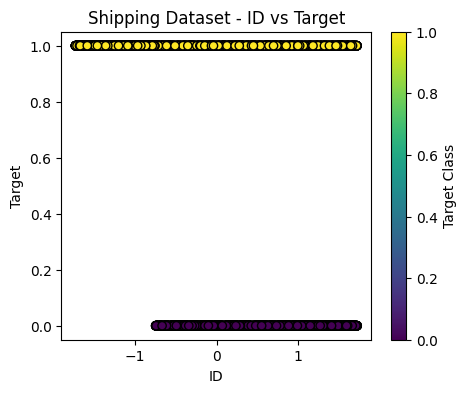

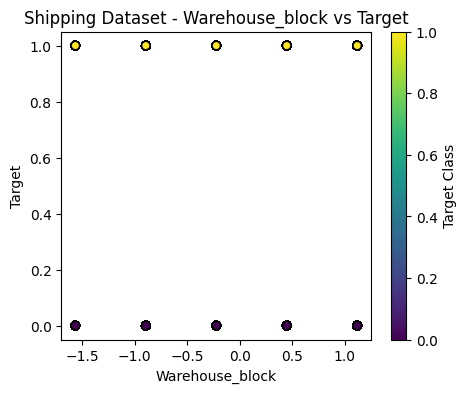

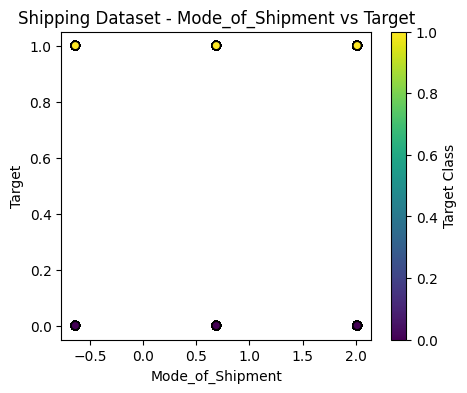

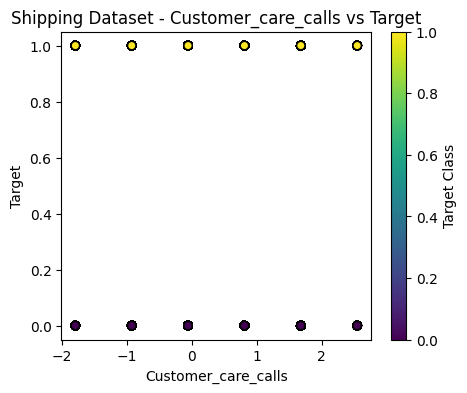

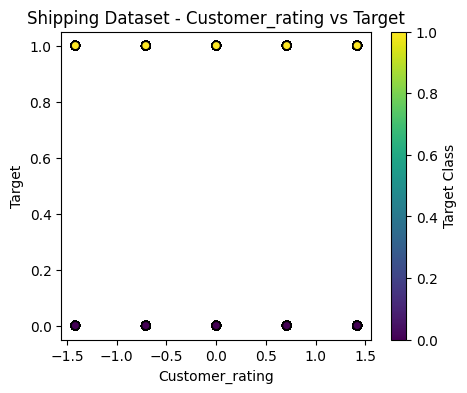

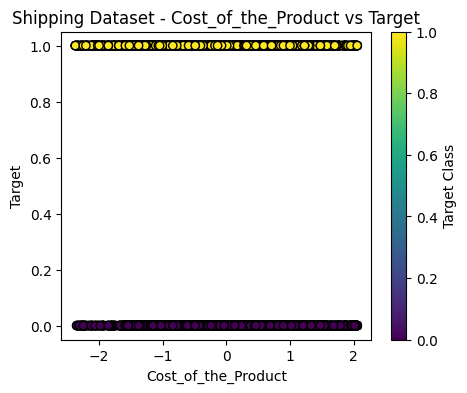

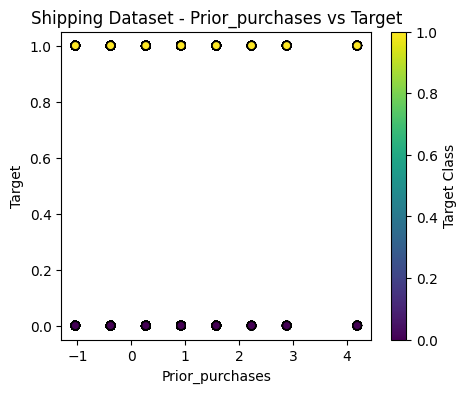

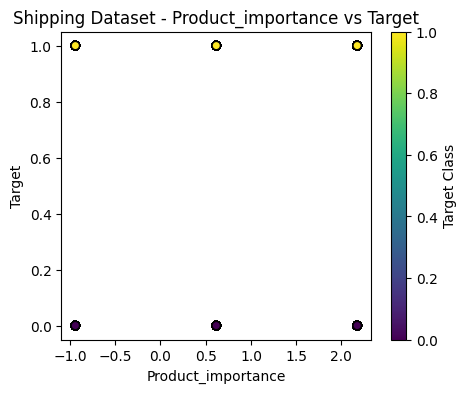

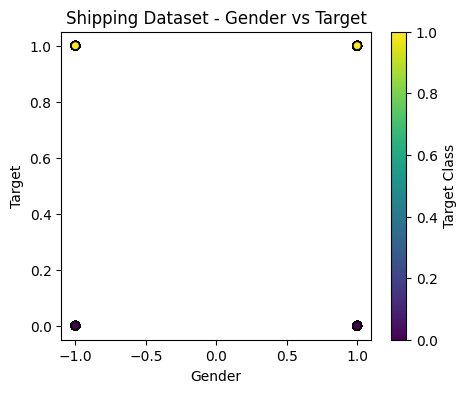

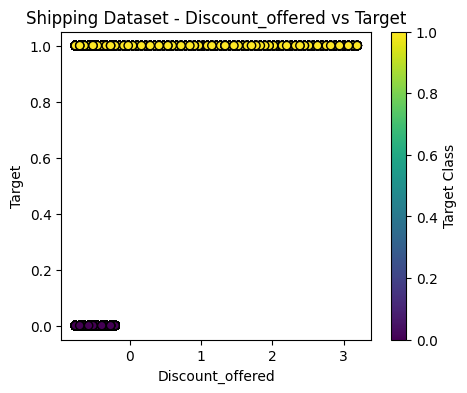

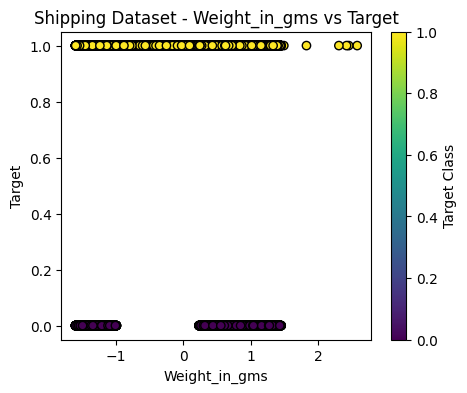

In [27]:
# Plotando gráficos de dispersão para as características dos dados
for index in range(X_train_scaled.shape[1]):
    plt.figure(figsize=(5, 4))
    plt.scatter(X_train_scaled[:, index], y_train, c=y_train, cmap='viridis', edgecolor='k')
    plt.xlabel(X.columns[index])
    plt.ylabel('Target')
    plt.title(f'Shipping Dataset - {X.columns[index]} vs Target')
    plt.colorbar(label='Target Class')
    plt.show()

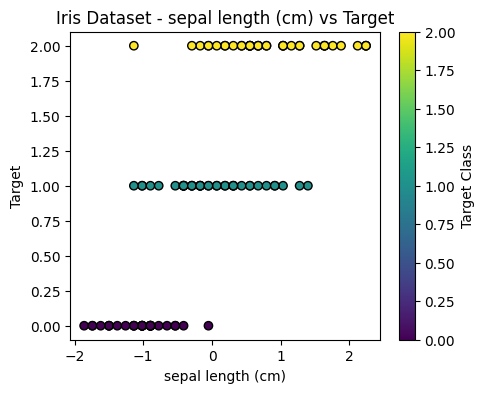

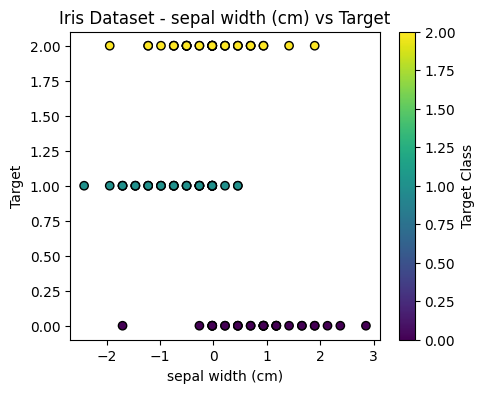

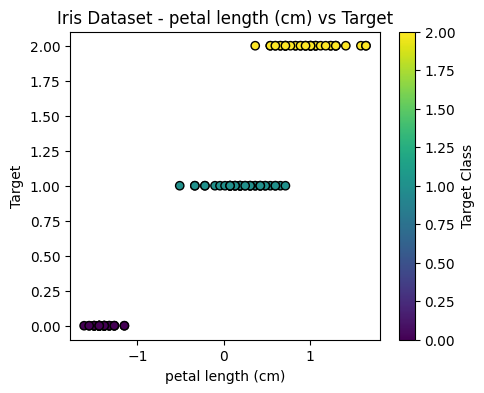

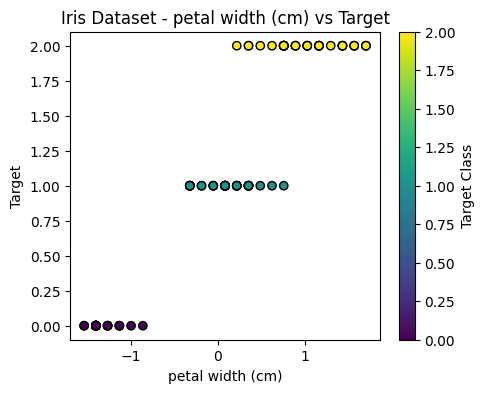

In [43]:
# Plotando gráficos de dispersão para as características dos dados
for feature_index in range(X_train_scaled_iris.shape[1]):
    plt.figure(figsize=(5, 4))
    plt.scatter(X_train_scaled_iris[:, feature_index], y_train_iris, c=y_train_iris, cmap='viridis', edgecolor='k')
    plt.xlabel(iris.feature_names[feature_index])
    plt.ylabel('Target')
    plt.title(f'Iris Dataset - {iris.feature_names[feature_index]} vs Target')
    plt.colorbar(label='Target Class')
    plt.show()

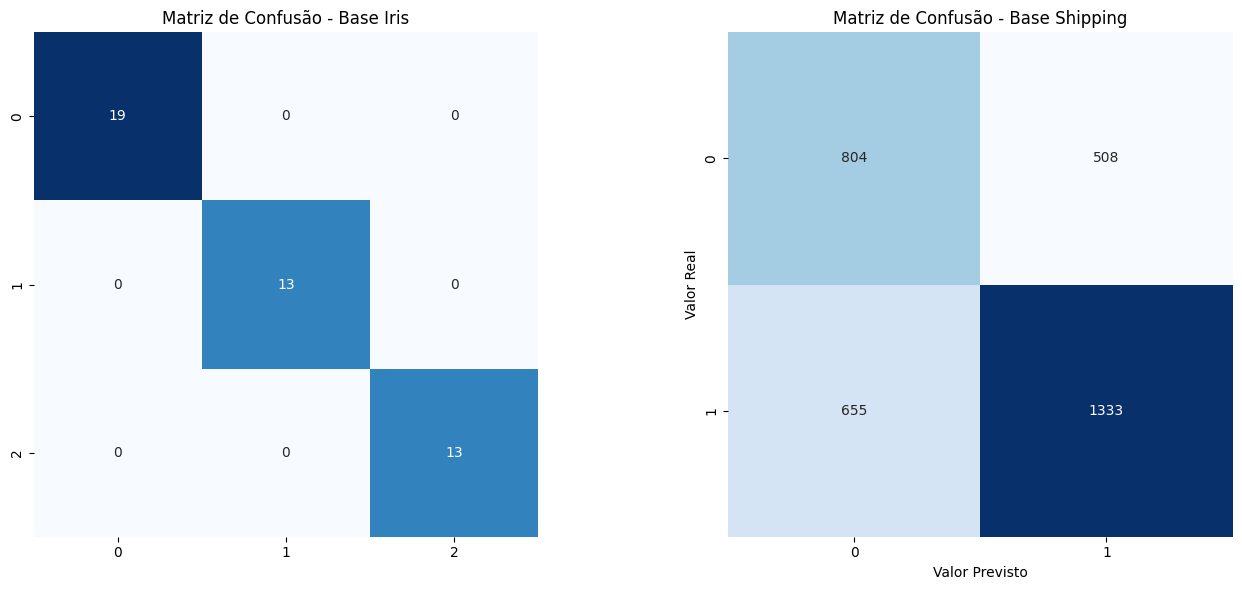

Acurácia - Base Iris: 1.0
Acurácia - Base Shipping: 0.6475757575757576


In [44]:
# Calculando as matrizes de confusão
cm1 = confusion_matrix(y_test_iris, y_pred_iris)
cm2 = confusion_matrix(y_test, y_pred)

# Configuração da figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotando a segunda matriz de confusão
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, ax=axes[1])
axes[0].set_xlabel('Valor Previsto')
axes[0].set_ylabel('Valor Real')
axes[0].set_title('Matriz de Confusão - Base Iris')

# Plotando a primeira matriz de confusão
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, ax=axes[0])
axes[1].set_xlabel('Valor Previsto')
axes[1].set_ylabel('Valor Real')
axes[1].set_title('Matriz de Confusão - Base Shipping')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# Exibindo as acurácias
print('Acurácia - Base Iris:', accuracy_iris)
print('Acurácia - Base Shipping:', accuracy)

## Explicação das Diferenças e Prováveis Motivos:

Em uma conclusão geral é notavel que a base Shipping os resultados não foram tão precisos como da base iris mas mudando os valores dos parametros conseguimos melhora um pouco os resultados.

## Testes 🧪

### Teste 1

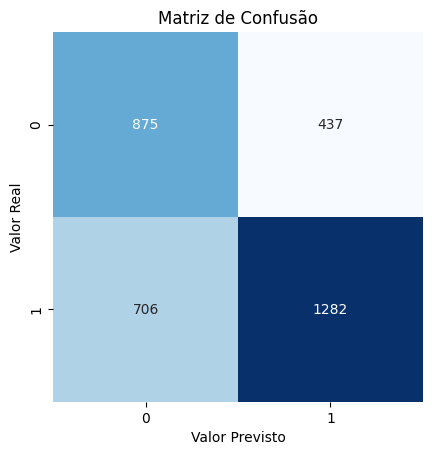

Accuracy: 0.6536363636363637
Classification Report:
                     precision    recall  f1-score   support

    Chegou no prazo       0.55      0.67      0.60      1312
Não chegou no prazo       0.75      0.64      0.69      1988

           accuracy                           0.65      3300
          macro avg       0.65      0.66      0.65      3300
       weighted avg       0.67      0.65      0.66      3300



In [49]:
# Inicializando o classificador KNN Teste 1
knn_classifier_test_1 = KNeighborsClassifier(algorithm='auto', n_neighbors=11, p=2, weights='uniform')

# Treinando o modelo
knn_classifier_test_1.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred_test_1 = knn_classifier_test_1.predict(X_test_scaled)

# Avaliando o modelo
accuracy_test_1 = accuracy_score(y_test, y_pred_test_1)
class_report_test_1 = classification_report(y_test, y_pred_test_1, target_names=target_names)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_test_1)

# Plotando a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

# Exibindo os resultados
print(f"Accuracy: {accuracy_test_1}")
print("Classification Report:")
print(class_report_test_1)

### Teste 2

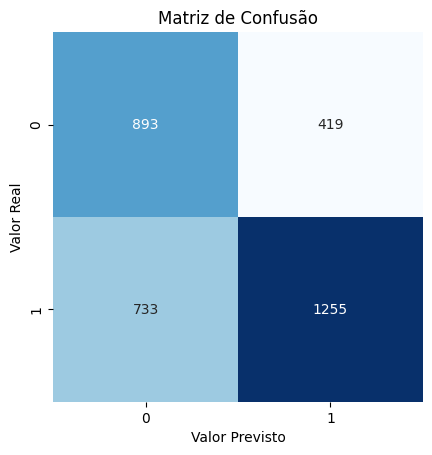

Accuracy: 0.6509090909090909
Classification Report:
                     precision    recall  f1-score   support

    Chegou no prazo       0.55      0.68      0.61      1312
Não chegou no prazo       0.75      0.63      0.69      1988

           accuracy                           0.65      3300
          macro avg       0.65      0.66      0.65      3300
       weighted avg       0.67      0.65      0.65      3300



In [54]:
# Inicializando o classificador KNN Teste 2
knn_classifier_test_2 = KNeighborsClassifier(algorithm='brute', n_neighbors=15, p=2, weights='distance')

# Treinando o modelo
knn_classifier_test_2.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred_test_2 = knn_classifier_test_2.predict(X_test_scaled)

# Avaliando o modelo
accuracy_test_2 = accuracy_score(y_test, y_pred_test_2)
class_report_test_2 = classification_report(y_test, y_pred_test_2, target_names=target_names)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_test_2)

# Plotando a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

# Exibindo os resultados
print(f"Accuracy: {accuracy_test_2}")
print("Classification Report:")
print(class_report_test_2)